In [97]:
import sys

sys.path.append("../")
sys.path.append("../data/")
sys.path.append("../model_evaluation")

In [149]:
import pandas as pd

data = pd.read_csv("../results/gpt_sapsam_t2t.csv")
data.dropna(inplace=True)
t2t_1_t2t, t2t_2_t2t, m2m_1_t2t, m2m_2_t2t = (
    data["t2t_eval_1"],
    data["t2t_eval_2"],
    data["m2m_eval_1"],
    data["m2m_eval_2"],
)
data = pd.read_csv("../results/gpt_sapsam_m2m.csv")
data.dropna(inplace=True)
t2t_1_m2m, t2t_2_m2m, m2m_1_m2m, m2m_2_m2m = (
    data["t2t_eval_1"],
    data["t2t_eval_2"],
    data["m2m_eval_1"],
    data["m2m_eval_2"],
)
import pandas as pd

data = pd.read_csv("../results/gemini_sapsam_t2t.csv")
data.dropna(inplace=True)
t2t_1_t2t_gem, t2t_2_t2t_gem, m2m_1_t2t_gem, m2m_2_t2t_gem = (
    data["t2t_eval_1"],
    data["t2t_eval_2"],
    data["m2m_eval_1"],
    data["m2m_eval_2"],
)
data = pd.read_csv("../results/gemini_sapsam_m2m.csv")
data.dropna(inplace=True)
t2t_1_m2m_gem, t2t_2_m2m_gem, m2m_1_m2m_gem, m2m_2_m2m_gem = (
    data["t2t_eval_1"],
    data["t2t_eval_2"],
    data["m2m_eval_1"],
    data["m2m_eval_2"],
)

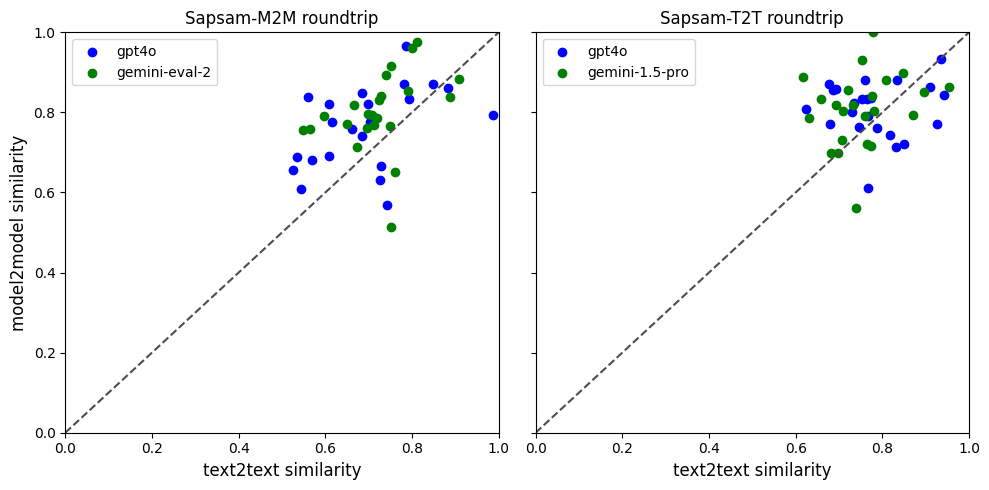

In [157]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True, sharex=True)


# axs[0].scatter(t2t_1_m2m.values, m2m_1_m2m.values, marker="*", color="red")
# axs[0].scatter(t2t_1_m2m.values, m2m_2_m2m.values, marker="*", color="orange")
# axs[0].scatter(t2t_2_m2m.values, m2m_1_m2m.values, marker="o", color="blue", label="gpt-eval-1")
axs[0].scatter(t2t_2_m2m.values, m2m_2_m2m.values, marker="o", color="blue", label="gpt4o")
# axs[0].scatter(t2t_2_m2m_gem.values, m2m_1_m2m_gem.values, marker="o", color="green", label="gemini-1.5-pro")
axs[0].scatter(t2t_2_m2m_gem.values, m2m_2_m2m_gem.values, marker="o", color="green", label="gemini-eval-2")
axs[0].set_title("Sapsam-M2M roundtrip")
axs[0].set_xlim(0, 1)
axs[0].set_ylim(0, 1)
axs[0].set_xlabel("text2text similarity", fontsize=12)
axs[0].set_ylabel("model2model similarity", fontsize=12)
axs[0].plot(axs[0].get_xlim(), axs[0].get_ylim(), ls="--", c=".3")

# axs[1].scatter(t2t_1_t2t.values, m2m_1_t2t.values, marker="*", color="red")
# axs[1].scatter(t2t_1_t2t.values, m2m_2_t2t.values, marker="*", color="orange")
axs[1].scatter(t2t_2_t2t.values, m2m_1_t2t.values, marker="o", color="blue", label="gpt4o")
# axs[1].scatter(t2t_2_t2t.values, m2m_2_t2t.values, marker="o", color="blue", label="gpt4o")
# axs[1].scatter(t2t_2_t2t_gem.values, m2m_1_t2t_gem.values, marker="o", color="green", label="gemini-eval-1")
axs[1].scatter(t2t_2_t2t_gem.values, m2m_2_t2t_gem.values, marker="o", color="green", label="gemini-1.5-pro")
axs[1].set_title("Sapsam-T2T roundtrip")
axs[1].set_xlim(0, 1)
axs[1].set_ylim(0, 1)
axs[1].set_xlabel("text2text similarity", fontsize=12)
# axs[1].set_ylabel("model2model")
axs[1].plot(axs[1].get_xlim(), axs[1].get_ylim(), ls="--", c=".3")


# Make sure to use the legend individually for each subplot, if desired
for ax in axs.flat:
    ax.legend()

plt.tight_layout()
# plt.title("PET roundtrip evaluation")
plt.show()

In [158]:
from scipy.stats import spearmanr

# t2t pipeline gpt
# print(spearmanr(list(t2t_1_t2t.values), list(m2m_1_t2t.values)))
# print(spearmanr(list(t2t_1_t2t.values), list(m2m_2_t2t.values)))
print(spearmanr(list(t2t_2_t2t.values), list(m2m_1_t2t.values)))
print(spearmanr(list(t2t_2_t2t.values), list(m2m_2_t2t.values)))

SignificanceResult(statistic=-0.03162055335968379, pvalue=0.8861121989269578)
SignificanceResult(statistic=0.16304347826086957, pvalue=0.457288347610068)


In [159]:
# m2m pipeline gpt
# print(spearmanr(list(t2t_1_m2m.values), list(m2m_1_m2m.values)))
# print(spearmanr(list(t2t_1_m2m.values), list(m2m_2_m2m.values)))
print(spearmanr(list(t2t_2_m2m.values), list(m2m_1_m2m.values)))
print(spearmanr(list(t2t_2_m2m.values), list(m2m_2_m2m.values)))

SignificanceResult(statistic=0.5990965556182948, pvalue=0.003216032207694255)
SignificanceResult(statistic=0.4680971202710334, pvalue=0.028017216645357352)


In [160]:
# t2t pipeline gemini
# print(spearmanr(list(t2t_1_t2t_gem.values), list(m2m_1_t2t_gem.values)))
# print(spearmanr(list(t2t_1_t2t_gem.values), list(m2m_2_t2t_gem.values)))
print(spearmanr(list(t2t_2_t2t_gem.values), list(m2m_1_t2t_gem.values)))
print(spearmanr(list(t2t_2_t2t_gem.values), list(m2m_2_t2t_gem.values)))

SignificanceResult(statistic=0.13339920948616601, pvalue=0.5439803025971467)
SignificanceResult(statistic=0.30830039525691705, pvalue=0.1523609266879103)


In [161]:
# m2m pipeline gemini
# print(spearmanr(list(t2t_1_m2m_gem.values), list(m2m_1_m2m_gem.values)))
# print(spearmanr(list(t2t_1_m2m_gem.values), list(m2m_2_m2m_gem.values)))
print(spearmanr(list(t2t_2_m2m_gem.values), list(m2m_1_m2m_gem.values)))
print(spearmanr(list(t2t_2_m2m_gem.values), list(m2m_2_m2m_gem.values)))

SignificanceResult(statistic=0.36067193675889325, pvalue=0.09089142283084274)
SignificanceResult(statistic=0.5454545454545454, pvalue=0.007103198332730011)
